🟦 1. Import & Generate Sample Time-Series Data

In [1]:
import pandas as pd
import numpy as np

# Simulate datetime index
rng = pd.date_range("2024-01-01 06:00:00", periods=50, freq="17min")

# Simulate passenger counts
data = np.random.randint(5, 50, size=len(rng))

df = pd.DataFrame({"timestamp": rng, "passengers": data})
df.set_index("timestamp", inplace=True)

df.head()

,passengers
timestamp,
2024-01-01 06:00:00,18
2024-01-01 06:17:00,6
2024-01-01 06:34:00,29
2024-01-01 06:51:00,38
2024-01-01 07:08:00,30


🟦 2. Inspect Original Frequency

In [2]:
df.index.to_series().diff().value_counts()

timestamp
0 days 00:17:00    49
Name: count, dtype: int64

🟦 3. Resample to Hourly Frequency

In [3]:
hourly = df.resample("H").sum()
hourly.head()

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/2472823511.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df.resample("H").sum()


,passengers
timestamp,
2024-01-01 06:00:00,91
2024-01-01 07:00:00,116
2024-01-01 08:00:00,93
2024-01-01 09:00:00,90
2024-01-01 10:00:00,95


🟦 4. Multiple Aggregations

In [4]:
hourly_stats = df.resample("H").agg({
    "passengers": ["sum", "mean", "max"]
})

hourly_stats

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/4220177015.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_stats = df.resample("H").agg({


passengers               
                           sum       mean max
timestamp                                    
2024-01-01 06:00:00         91  22.750000  38
2024-01-01 07:00:00        116  29.000000  36
2024-01-01 08:00:00         93  31.000000  46
2024-01-01 09:00:00         90  22.500000  36
2024-01-01 10:00:00         95  31.666667  46
2024-01-01 11:00:00         92  23.000000  48
2024-01-01 12:00:00         38  12.666667  23
2024-01-01 13:00:00         87  21.750000  24
2024-01-01 14:00:00         57  19.000000  26
2024-01-01 15:00:00        117  29.250000  36
2024-01-01 16:00:00         58  19.333333  29
2024-01-01 17:00:00         91  22.750000  49
2024-01-01 18:00:00         69  23.000000  33
2024-01-01 19:00:00        132  33.000000  46

🟦 5. Daily Resampling

In [5]:
daily = df.resample("D").sum()
daily

,passengers
timestamp,
2024-01-01,1226


🟦 6. Weekly & Monthly Resampling

In [6]:
weekly = df.resample("W").sum()
monthly = df.resample("M").sum()

weekly, monthly

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/4163575401.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").sum()


(            passengers
 timestamp             
 2024-01-07        1226,
             passengers
 timestamp             
 2024-01-31        1226)

🟦 7. Handle Missing Time Periods

In [7]:
df_missing = df.drop(df.index[5:10])
df_missing

,passengers
timestamp,
2024-01-01 06:00:00,18
2024-01-01 06:17:00,6
2024-01-01 06:34:00,29
2024-01-01 06:51:00,38
2024-01-01 07:08:00,30
2024-01-01 08:50:00,46
2024-01-01 09:07:00,20
2024-01-01 09:24:00,36
2024-01-01 09:41:00,5


In [8]:
filled = df_missing.resample("H").sum().fillna(0)
filled

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/1587038798.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filled = df_missing.resample("H").sum().fillna(0)


,passengers
timestamp,
2024-01-01 06:00:00,91
2024-01-01 07:00:00,30
2024-01-01 08:00:00,46
2024-01-01 09:00:00,90
2024-01-01 10:00:00,95
2024-01-01 11:00:00,92
2024-01-01 12:00:00,38
2024-01-01 13:00:00,87
2024-01-01 14:00:00,57


🟦 8. Forward Fill and Backward Fill

In [9]:
ffill = df_missing.resample("H").mean().ffill()
bfill = df_missing.resample("H").mean().bfill()

ffill.head(), bfill.head()

/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/3394712145.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ffill = df_missing.resample("H").mean().ffill()
/var/folders/fc/mkj1rmtd1fxdvgn96m4pmp1w0000gn/T/ipykernel_1446/3394712145.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bfill = df_missing.resample("H").mean().bfill()


(                     passengers
 timestamp                      
 2024-01-01 06:00:00   22.750000
 2024-01-01 07:00:00   30.000000
 2024-01-01 08:00:00   46.000000
 2024-01-01 09:00:00   22.500000
 2024-01-01 10:00:00   31.666667,
                      passengers
 timestamp                      
 2024-01-01 06:00:00   22.750000
 2024-01-01 07:00:00   30.000000
 2024-01-01 08:00:00   46.000000
 2024-01-01 09:00:00   22.500000
 2024-01-01 10:00:00   31.666667)

🟦 9. Comparing Original vs Resampled Data

In [10]:
comparison = pd.DataFrame({
    "original_total": df["passengers"].sum(),
    "hourly_total": hourly["passengers"].sum()
}, index=["Comparison"])

comparison

,original_total,hourly_total
Comparison,1226,1226


🟦 10. Visualization of Resampling

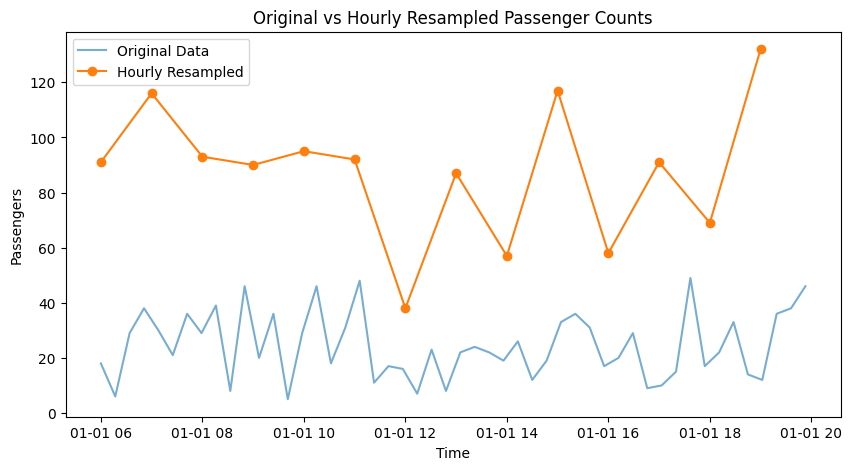

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(df.index, df["passengers"], label="Original Data", alpha=0.6)
plt.plot(hourly.index, hourly["passengers"], label="Hourly Resampled", marker="o")

plt.legend()
plt.title("Original vs Hourly Resampled Passenger Counts")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

# 🟦 Summary

⏱ What You Learned in This Subsection

✅ Resample time series using H, D, W, and M frequencies

✅ Apply multiple aggregations after resampling

✅ Handle missing time periods using fillna(), ffill(), and bfill()

✅ Compare original data frequency with resampled data

✅ Visualize and analyze time-series changes